In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gapless import World
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pylab as pl


In [2]:
#build electrodes

a = 1088e-6 #central electrode 'radius'
b = 1912e-6 #width of compensation electrodes

include_center = 1
celec_inner = 126e-6 #center electrode inner diameter
celec_outer = 600e-6 #center electrode outer diameter

r = a + b
it = 100 #number of iterations for boxes

h = r/((2**.5)*it) #outer step size

shorts = ['9']

# y coords of the initial dc electrodes
y_ranges =  np.array([(0, h),
            (a,(r**2-h**2)**.5),
            (a,(r**2-h**2)**.5),
            (0, h),
            (0,-h),
            (-a,-(r**2-h**2)**.5),
            (-a,-(r**2-h**2)**.5),
            (0, -h),
            ])

# x coords of the initial dc electrodes
x_ranges =  np.array([(a, (r**2-h**2)**.5),
            (0,h),
            (0,-h),
            (-a, -(r**2-h**2)**.5),
            (-a, -(r**2-h**2)**.5),
            (0, -h),
            (0, h),
            (a, (r**2-h**2)**.5),
            ])



y_ranges1 = []
x_ranges1 = []
y_ranges2 = []
x_ranges2 = []
y_ranges3 = []
x_ranges3 = []
y_ranges4 = []
x_ranges4 = []
y_ranges5 = []
x_ranges5 = []
y_ranges6 = []
x_ranges6 = []
y_ranges7 = []
x_ranges7 = []
y_ranges8 = []
x_ranges8 = []

#coordinates of iterated electrodes
for i in range(1,it-1):
    y_ranges1.append((h*(i),h*(i+1)))
    x_ranges2.append((h*(i),h*(i+1)))
    x_ranges3.append((-h*(i),-h*(i+1)))
    y_ranges4.append((h*(i),h*(i+1)))
    y_ranges5.append((-h*(i),-h*(i+1)))
    x_ranges6.append((-h*(i),-h*(i+1)))
    x_ranges7.append((h*(i),h*(i+1)))
    y_ranges8.append((-h*(i),-h*(i+1)))
    if i < it*a/r:
        x_ranges1.append(((a**2-(h*(i))**2)**.5, (r**2-(h*(i+1))**2)**.5))
        y_ranges2.append(((a**2-(h*(i))**2)**.5, (r**2-(h*(i+1))**2)**.5))
        y_ranges3.append(((a**2-(h*(i))**2)**.5, (r**2-(h*(i+1))**2)**.5))  
        x_ranges4.append((-(a**2-(h*(i))**2)**.5, -(r**2-(h*(i+1))**2)**.5))
        x_ranges5.append((-(a**2-(h*(i))**2)**.5, -(r**2-(h*(i+1))**2)**.5))
        y_ranges6.append((-(a**2-(h*(i))**2)**.5, -(r**2-(h*(i+1))**2)**.5))
        y_ranges7.append((-(a**2-(h*(i))**2)**.5, -(r**2-(h*(i+1))**2)**.5))
        x_ranges8.append(((a**2-(h*(i))**2)**.5, (r**2-(h*(i+1))**2)**.5))   
    else:
        x_ranges1.append((h*(i+1), (r**2-(h*(i+1))**2)**.5))
        y_ranges2.append((h*(i+1), (r**2-(h*(i+1))**2)**.5))         
        y_ranges3.append((h*(i+1), (r**2-(h*(i+1))**2)**.5))  
        x_ranges4.append((-h*(i+1), -(r**2-(h*(i+1))**2)**.5))
        x_ranges5.append((-h*(i+1), -(r**2-(h*(i+1))**2)**.5))
        y_ranges6.append((-h*(i+1), -(r**2-(h*(i+1))**2)**.5))
        y_ranges7.append((-h*(i+1), -(r**2-(h*(i+1))**2)**.5)) 
        x_ranges8.append((h*(i+1), (r**2-(h*(i+1))**2)**.5))    

xlist = [x_ranges1,x_ranges2,x_ranges3,x_ranges4,x_ranges5,x_ranges6,x_ranges7,x_ranges8]
ylist = [y_ranges1,y_ranges2,y_ranges3,y_ranges4,y_ranges5,y_ranges6,y_ranges7,y_ranges8]  

if include_center:
    ss = celec_outer/it
    y_ranges = np.append(y_ranges,[(celec_inner,celec_outer)],axis = 0)
    x_ranges = np.append(x_ranges,[(0,ss)],axis = 0)
    x_rangesc = []
    y_rangesc = []
    
    y_rangesc.append((celec_inner,celec_outer))
    x_rangesc.append((0,-ss))
    y_rangesc.append((-celec_inner,-celec_outer))
    x_rangesc.append((0,-ss))
    y_rangesc.append((-celec_inner,-celec_outer))
    x_rangesc.append((0,ss))
    
    for i in range(1,it):
        x_rangesc.append((ss*(i),ss*(i+1)))
        x_rangesc.append((-ss*(i),-ss*(i+1)))
        x_rangesc.append((ss*(i),ss*(i+1)))
        x_rangesc.append((-ss*(i),-ss*(i+1)))
        if i*ss >= celec_inner:
            y_rangesc.append((0,(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append((0,(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append((0,-(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append((0,-(celec_outer**2-((i*ss))**2)**.5))
        else:
            y_rangesc.append(((celec_inner**2-((i*ss))**2)**.5,(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append(((celec_inner**2-((i*ss))**2)**.5,(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append((-(celec_inner**2-((i*ss))**2)**.5,-(celec_outer**2-((i*ss))**2)**.5))
            y_rangesc.append((-(celec_inner**2-((i*ss))**2)**.5,-(celec_outer**2-((i*ss))**2)**.5))
            
    xlist.append(x_rangesc)
    ylist.append(y_rangesc)



In [3]:
w = World(1)
# first build the dc electrodes
i=0
r = [0,0,185e-6] #395
for xr, yr in zip( x_ranges, y_ranges):
    i=i+1
    w.add_electrode(str(i), xr, yr, 'dc')
    for xrp, yrp in zip(xlist[i-1], ylist[i-1]):
            w.dc_electrode_dict[str(i)].extend( [[ xrp,yrp ]] )    
    w.dc_electrode_dict[str(i)].expand_in_multipoles(r)  #this step takes a while
    print i

1
2
3
4
5
6
7
8
9


In [4]:
def plot_field(field,ax):
    
    mps = ['Ex','Ey','Ez','U1','U3']
    idx =  mps.index(field)
    voltages = C[idx]
    if field == 'U1':
        voltages = np.multiply(voltages,2)
    if field in ['U1','U3']:
        voltages = np.multiply(voltages,1e-3)
    
    def indiPlotter(elec,mycolor):
        xm=elec[0][0]*1e6
        xM=elec[0][1]*1e6
        ym=elec[1][0]*1e6
        yM=elec[1][1]*1e6

        #plot vertical lines
        ax.plot([xm,xm],[ym,yM],color=mycolor)
        ax.plot([xM,xM],[ym,yM],color=mycolor)

        #plot horizontal lines
        ax.plot([xm,xM],[ym,ym],color=mycolor)
        ax.plot([xm,xM],[yM,yM],color=mycolor)
     
#     norm = mpl.colors.Normalize(vmin=min(voltages), vmax=max(voltages))
#     cmap = cm.viridis
#     m = cm.ScalarMappable(norm=norm, cmap=cmap)
#     print voltages
    
    i=0
    for i,key in enumerate(w.electrode_dict):
        myElec = w.electrode_dict[key]
        if key != '9':
            mycolor = m.to_rgba(voltages[int(key)-1])
            indiPlotter([(myElec.x1,myElec.x2),(myElec.y1,myElec.y2)],mycolor) #plot each electrode
            for subelec in myElec.sub_electrodes:
                indiPlotter([(subelec.x1,subelec.x2),(subelec.y1,subelec.y2)],mycolor)
    orig_axes=plt.axis()
    new_axes=[0,0,0,0]

    #creating margins
    h_marg=100
    v_marg=1
    new_axes[0]=orig_axes[0]-h_marg
    new_axes[1]=orig_axes[1]+h_marg
    new_axes[2]=orig_axes[2]-v_marg
    new_axes[3]=orig_axes[3]-v_marg

    ax.set_xlabel('x ($\mu$m)')
    ax.set_xlim(-3200,3200)
    ax.set_ylim(-3200,3200)
    ax.set_aspect('equal')
    ax.text(0,0,field,horizontalalignment='center',verticalalignment='center',fontsize=16)
    

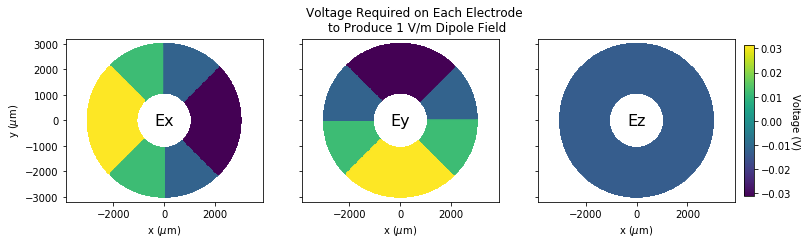

In [6]:
fig,ax = plt.subplots(1,3,figsize = (13,3),sharey=True)
mps = ['Ex','Ey','Ez','U1','U3']
C = w.multipole_control_matrix((0,0,385e-6), mps, r0= 1,shorted_electrodes = ['9'])
top = np.amax(C[:3,:])
bottom = np.amin(C[:3,:])
norm = mpl.colors.Normalize(vmin=bottom, vmax=top)
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(30)

for j,el in enumerate(mps):
    if j<3:
        plot_field(el,ax[j])
ax[0].set_ylabel('y ($\mu$m)')
# cb = plt.colorbar(m)
# cb.ax.set_ylabel('Voltage (V)',rotation = -90,labelpad = 6)
plt.suptitle('Voltage Required on Each Electrode \nto Produce 1 V/m Dipole Field',y = 1.03)

fig.subplots_adjust(right=.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cb = fig.colorbar(m, cax=cbar_ax)
cb.ax.set_ylabel('Voltage (V)',rotation = -90,labelpad = 9)

plt.show()


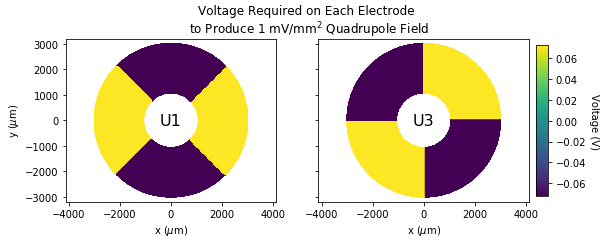

In [43]:
fig,ax = plt.subplots(1,2,figsize = (9,3),sharey=True)
mps = ['Ex','Ey','Ez','U1','U3']
C = w.multipole_control_matrix((0,0,385e-6), mps,r0=1e-3,shorted_electrodes = ['9'])

norm = mpl.colors.Normalize(vmin=1e-3*min(C[4]), vmax=1e-3*max(C[4]))
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(30)

for j,el in enumerate(mps):
    if j>2:
        plot_field(el,ax[j-3])
ax[0].set_ylabel('y ($\mu$m)')
# cb = plt.colorbar(m,ax=ax[1])
fig.subplots_adjust(right=.84)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cb = fig.colorbar(m, cax=cbar_ax)
cb.ax.set_ylabel('Voltage (V)',rotation = -90,labelpad = 6)
plt.suptitle('Voltage Required on Each Electrode \nto Produce 1 mV/mm$^2$ Quadrupole Field',y=1.03)
plt.show()